# Student_exam_oriented_ex_6_1

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
from local.lib.data import load_data
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
#!pip install cvxpy

In [2]:
import cvxpy as cp

## Exercise


- Algorithm: Block Coordinate Descent
- Problem: Binary classification using an SVM.

$\underset{{\bf{w}}}{\arg\min}f({\bf{w}})=\underset{{\bf{w}}\in\mathbb{R}^{d+1}}{\textrm{ arg min}}\left(\frac{1}{n}\sum_{i=1}^n\textrm{max}\left(1-y_{i}\left({\bf{w}}^{T}{\bf{x}}_{i}\right),0\right)+\frac{\lambda}{2}\left\Vert {\bf{w}}\right\Vert _{2}^{2}\right)$

- Banknote authentication dataset
    - 4 features: variance, skewness and curtosis of wavelet transform of image, and entropy of the image.
        - We use 4 features: $\bf{X}$ is a $500\times 4$ matrix containing 500 dataset entries.
    - Target: to predict the right class of the banknote (authentic or forged)
        -  Thus, ${\bf{y}}$ is a $500\times1$ vector containing the classes

Hint:

The subgradient of $f({\bf{w}})$ is equal to:

$$
g({\bf{w}})=\lambda {\bf{w}} +\frac{1}{n}\sum_{i=1}^n \begin{cases}
\begin{array}{c}
0\\
-y_{i}{\bf{x}}_{i}
\end{array} & \begin{array}{c}
\text{if}\,\,y_{i}{\bf{w}}^T{\bf{x}}_i>1\\
\text{if}\,\,y_{i}{\bf{w}}^T{\bf{x}}_i<1
\end{array}\end{cases}\label{eq:subgrad_svm_expression}
$$

In [3]:
#load data
X,y = load_data("classification", 2)
n,d = X.shape

In [5]:
# Constant parameters
lamb = 0.01   #regularisation parameter
Niter= 1000   # Number of iterations for each algorithm

In [4]:
#cvx_solver
def solver_cvx(n,X,Y,lamb,objective_fn):
    n_columns = X.shape[1]
    w = cp.Variable(n_columns)
    lambd = cp.Parameter(nonneg=True)
    lambd.value = lamb
    problem = cp.Problem(
        cp.Minimize(objective_fn(n, X, Y, w, lambd))
    )
    problem.solve()
    return w.value

In [7]:
# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.sum(cp.pos(1-cp.multiply(Y,X @ w)))
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
loss_svm_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)

# Solution of the empirical risk using CVX
w_svm_cvx=solver_cvx(n,X,y,lamb,loss_svm_L2)

w = cp.Variable(w_svm_cvx.shape[0])
w.value = w_svm_cvx
f_cvx=loss_svm_L2(n,X,y,w_svm_cvx,lamb).value

print(f'The loss function f at the optimum takes the value {f_cvx}')

f_cvx = (np.kron(f_cvx,np.ones((1,Niter+1)))).flatten()

The loss function f at the optimum takes the value 0.11017368019837978


In [18]:
#Function that estimates the loss for several w at once.
f = lambda n, X, Y, w, lambd: (1/n)*np.sum(np.maximum(np.zeros((n,w.shape[1])),np.ones((n,w.shape[1]))-np.diag(Y)@(X@w)),axis=0) + (lambd/2)*np.sum(w**2,axis=0)

In [19]:
# Block Coordinate Descent

#Constants
eta = 0.01        # learning rate
p = 2             # Number of blocks: ensure that Nc can be divided by p!!
m = d / p         # Number of variables per block


w_bcd = np.zeros((d,Niter+1))
for k in range(Niter):
    for i in range(p):                                # Here we have the parallel workers
        i_index = np.arange(i*m,(i+1)*m).astype(int)  # Indexes of block of variables to optimize
        
        # Complete the code using the subgradient of the SVM to update the weigths 
        # Keep the weight values for all the iterations
        w_bcd[i_index, k+1] = ...

f_bcd=f(n,X,y,w_bcd,lamb)

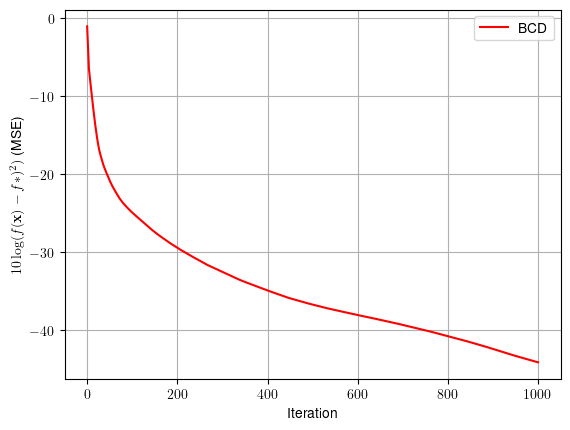

In [21]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
t = range(Niter+1)
plt.plot(t, 10*np.log10((f_bcd-f_cvx)**2+np.finfo(float).eps), color = 'r',label = 'BCD')
plt.grid()
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$10\log(f({\bf{x}})-f*)^2)$ (MSE)')
plt.show()